===========iteration:0===========
He:2.484131539537154
std=0.01:2.3025229164699135
Xavier:2.304347579493474
===========iteration:100===========
He:1.7045714542226484
std=0.01:2.30264462910883
Xavier:2.2491993506083783
===========iteration:200===========
He:0.7996352271249509
std=0.01:2.301912090092705
Xavier:2.14452410676705
===========iteration:300===========
He:0.5056524304596928
std=0.01:2.302691194964004
Xavier:1.8560755688735866
===========iteration:400===========
He:0.3963651667698821
std=0.01:2.2997542032027285
Xavier:1.3622295090933845
===========iteration:500===========
He:0.4145373525734054
std=0.01:2.3012529032147677
Xavier:0.9913794257782205
===========iteration:600===========
He:0.35344880135748
std=0.01:2.3038404074296333
Xavier:0.7296065728334781
===========iteration:700===========
He:0.3140055427923679
std=0.01:2.3038501038443338
Xavier:0.6335743085133496
===========iteration:800===========
He:0.2824652471223691
std=0.01:2.305048236509122
Xavier:0.5365138465895509
=====

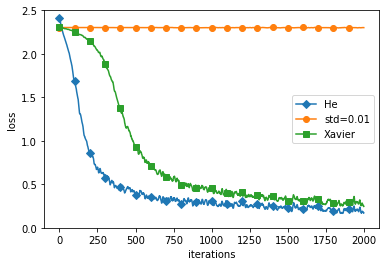

In [2]:
import os
import sys

sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()